## Binomial Tree Pricing for Vanilla European Options

This notebook implements a simple binomial tree method to price vanilla European options.

We use:

- **CRR model** for up/down movements
- **Backward induction** to evaluate the option price at time 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import black_scholes_price
from pricing.binomial_tree import BinomialVanillaPricer

In [2]:
# Parameters
S0 = 100     # Spot price
K = 100      # Strike price
T = 1.0      # Time to maturity
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
N = 100      # Number of time steps

In [3]:
# Call Option Pricing

call_pricer = BinomialVanillaPricer(S0, K, T, r, sigma, N=N, is_call=True)
call_price = call_pricer.price()
print(f"Binomial Call Price: {call_price:.4f}")

Binomial Call Price: 10.4306


In [4]:
# Put Option Pricing

put_pricer = BinomialVanillaPricer(S0, K, T, r, sigma, N=N, is_call=False)
put_price = put_pricer.price()
print(f"Binomial Put Price: {put_price:.4f}")

Binomial Put Price: 5.5536


---

### Binomial Tree Convergence vs Black-Scholes Price

This section visualizes how the binomial tree method converges to the analytical Black-Scholes-Merton (BSM) price as we increase the number of steps (`N`). We plot the binomial price for increasing `N` and compare it with the constant BSM price to evaluate convergence.

In [5]:
# Parameters

S0 = 100     # Initial stock price
K = 100      # Strike price
T = 1.0      # Time to maturity (1 year)
r = 0.05     # Risk-free rate
sigma = 0.2  # Volatility
option_type = 'call'  # 'put' also possible

bsm_price = black_scholes_price(S0, K, T, r, sigma, option_type)
print(f"Black-Scholes Price: {bsm_price:.4f}")

Black-Scholes Price: 10.4506


In [6]:
# Convergence Loop

steps = np.arange(1, 301, 5)
binomial_prices = []

for N in steps:
    pricer = BinomialVanillaPricer(S0, K, T, r, sigma, N, option_type)
    price = pricer.price()
    binomial_prices.append(price)

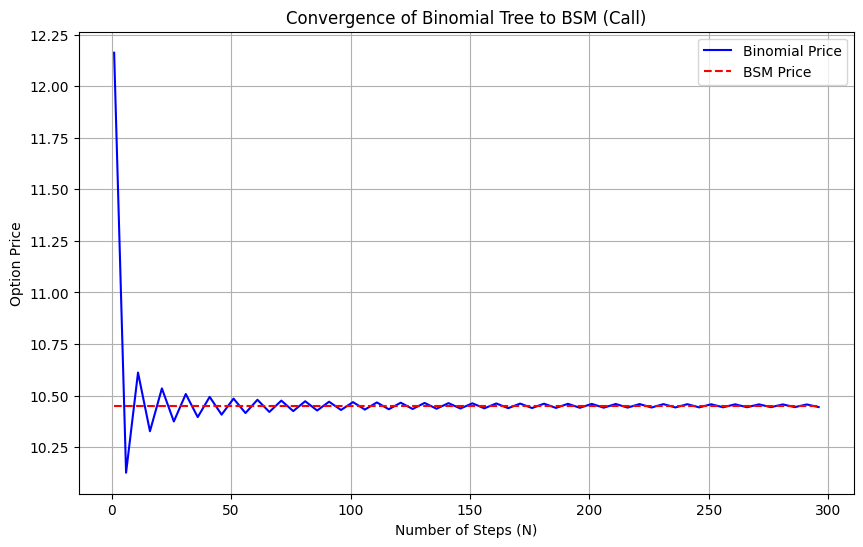

In [7]:
# Convergence Plot

plt.figure(figsize=(10, 6))
plt.plot(steps, binomial_prices, label='Binomial Price', color='blue')
plt.hlines(bsm_price, steps[0], steps[-1], colors='red', linestyles='dashed', label='BSM Price')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.title(f'Convergence of Binomial Tree to BSM ({option_type.title()})')
plt.legend()
plt.grid(True)
plt.show()

### 🔍 Observation

As the number of steps in the binomial tree increases, the computed price converges toward the analytical Black-Scholes price. This validates the accuracy of the binomial tree method and highlights its convergence behavior.

The convergence is slower for fewer steps but improves significantly beyond ~100 steps.

---